# Import Data and useful libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install plot_metric
!cp gdrive/MyDrive/HIGGS.csv.gz .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gzip -d HIGGS.csv.gz

In [ ]:
import fileinput
import pandas as pd
import os , sys, warnings
import numpy as np
import h5py
import tensorflow
import matplotlib.pyplot as plt
from plot_metric.functions import BinaryClassification
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from warnings import simplefilter
from sklearn.exceptions import DataConversionWarning
from keras.models import Sequential
from keras.optimizers import Adam
from keras.initializers import TruncatedNormal
from keras.layers import Input, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import seaborn as sns
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

np.random.seed(1337)  # for reproducibility



simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
print("Setup Ready!")



Setup Ready!


# Explaratory Data Analysis

In [ ]:
data=pd.read_csv('HIGGS.csv')

In [ ]:
data.head()

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [ ]:
data_n= data.set_axis(['label', 'L_pT', 'L_eta', 'L_phi', 'E_T', 'E_phi', 'J1_pt', 'J1_eta', 'J1_phi', 'J1b-tag', 'J2_pt', 'J2_eta', 'J2_phi', 'J2b-tag', 'J3_pt', 'J3_eta', 'J3_phi', 'J3b-tag', 'J4_pt', 'J4_eta', 'J4_phi', 'J4b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'], axis=1)
data_n.head()

,label,L_pT,L_eta,L_phi,E_T,E_phi,J1_pt,J1_eta,J1_phi,J1b-tag,...,J4_eta,J4_phi,J4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(data_n.head(100))

    label   L_pT  L_eta      L_phi    E_T  E_phi  J1_pt     J1_eta  J1_phi  \
0     1.0  0.908  0.329  3.594e-01  1.498 -0.313  1.096 -5.575e-01  -1.588   
1     1.0  0.799  1.471 -1.636e+00  0.454  0.426  1.105  1.282e+00   1.382   
2     0.0  1.344 -0.877  9.359e-01  1.992  0.882  1.786 -1.647e+00  -0.942   
3     1.0  1.105  0.321  1.522e+00  0.883 -1.205  0.681 -1.070e+00  -0.922   
4     0.0  1.596 -0.608  7.075e-03  1.818 -0.112  0.848 -5.664e-01   1.581   
5     1.0  0.409 -1.885 -1.027e+00  1.672 -1.605  1.338  5.543e-02   0.013   
6     1.0  0.934  0.629  5.275e-01  0.238 -0.967  0.548 -5.944e-02  -1.707   
7     1.0  1.405  0.537  6.896e-01  1.180 -0.110  3.202 -1.527e+00  -1.576   
8     1.0  1.177  0.104  1.397e+00  0.480  0.266  1.136  1.535e+00  -0.253   
9     1.0  0.946  1.111  1.218e+00  0.908  0.822  1.153 -3.654e-01  -1.566   
10    0.0  0.739 -0.178  8.299e-01  0.505 -0.130  0.961 -3.555e-01  -1.717   
11    1.0  1.384  0.117 -1.180e+00  0.763 -0.080  1.020  8.773e-

In [ ]:
data_n.shape

(10999999, 29)

In [ ]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 29 columns):
 #   Column   Dtype  
---  ------   -----  
 0   label    float64
 1   L_pT     float64
 2   L_eta    float64
 3   L_phi    float64
 4   E_T      float64
 5   E_phi    float64
 6   J1_pt    float64
 7   J1_eta   float64
 8   J1_phi   float64
 9   J1b-tag  float64
 10  J2_pt    float64
 11  J2_eta   float64
 12  J2_phi   float64
 13  J2b-tag  float64
 14  J3_pt    float64
 15  J3_eta   float64
 16  J3_phi   float64
 17  J3b-tag  float64
 18  J4_pt    float64
 19  J4_eta   float64
 20  J4_phi   float64
 21  J4b-tag  float64
 22  m_jj     float64
 23  m_jjj    float64
 24  m_lv     float64
 25  m_jlv    float64
 26  m_bb     float64
 27  m_wbb    float64
 28  m_wwbb   float64
dtypes: float64(29)
memory usage: 2.4 GB


In [ ]:
cor_matr = data_n.corr()

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 5,
                       ):
    print(cor_matr.head(100))

               label     L_pT    L_eta    L_phi      E_T        E_phi  \
label    1.00000e+00 -0.04860 -0.00013  0.00064 -0.10000 -5.38569e-04   
L_pT    -4.85989e-02  1.00000 -0.00015 -0.00018 -0.13953  2.31627e-04   
L_eta   -1.34044e-04 -0.00015  1.00000  0.00042 -0.00044  1.60602e-04   
L_phi    6.42734e-04 -0.00018  0.00042  1.00000 -0.00001 -4.45178e-02   
E_T     -9.99993e-02 -0.13953 -0.00044 -0.00001  1.00000 -2.32150e-04   
E_phi   -5.38569e-04  0.00023  0.00016 -0.04452 -0.00023  1.00000e+00   
J1_pt    5.69077e-02  0.16580 -0.00040 -0.00013  0.19916  1.18457e-04   
J1_eta  -2.56925e-06 -0.00013  0.26480  0.00079 -0.00012 -6.42440e-04   
J1_phi   4.30695e-04 -0.00033 -0.00019 -0.16788 -0.00004 -1.54905e-01   
J1b-tag -9.73110e-03 -0.00626  0.00027 -0.00018 -0.03037  9.72486e-07   
J2_pt    2.18906e-02  0.00461  0.00012 -0.00024  0.03950  3.98777e-04   
J2_eta  -1.83454e-04  0.00003  0.26461  0.00042  0.00018 -1.18653e-04   
J2_phi  -7.34346e-04  0.00007 -0.00042 -0.09368  0.

In [ ]:
# Drop the following features # J1b-tag, J3b-tag, J4b-tag
data_nn = data_n.drop(columns=['J1b-tag', 'J3b-tag', 'J4b-tag'], axis=1)

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 5,
                       ):
    print(data_nn.head(100))

    label     L_pT    L_eta    L_phi      E_T    E_phi    J1_pt   J1_eta  \
0     1.0  0.90754  0.32915  0.35941  1.49797 -0.31301  1.09553 -0.55752   
1     1.0  0.79883  1.47064 -1.63597  0.45377  0.42563  1.10487  1.28232   
2     0.0  1.34438 -0.87663  0.93591  1.99205  0.88245  1.78607 -1.64678   
3     1.0  1.10501  0.32136  1.52240  0.88281 -1.20535  0.68147 -1.07046   
4     0.0  1.59584 -0.60781  0.00707  1.81845 -0.11191  0.84755 -0.56644   
5     1.0  0.40939 -1.88468 -1.02729  1.67245 -1.60460  1.33801  0.05543   
6     1.0  0.93390  0.62913  0.52753  0.23803 -0.96657  0.54781 -0.05944   
7     1.0  1.40514  0.53660  0.68955  1.17957 -0.11006  3.20240 -1.52696   
8     1.0  1.17657  0.10416  1.39700  0.47972  0.26551  1.13556  1.53483   
9     1.0  0.94597  1.11124  1.21834  0.90764  0.82154  1.15324 -0.36542   
10    0.0  0.73936 -0.17829  0.82993  0.50454 -0.13022  0.96105 -0.35552   
11    1.0  1.38410  0.11682 -1.17988  0.76291 -0.07978  1.01986  0.87732   
12    1.0  1

# Prepare Data for training testing and evaluation

In [ ]:
X = data.iloc[:10000,1:] # data.iloc[:,1:]
y = data.iloc[:10000,0] #data.iloc[:,0]

In [ ]:
X_train1, X_val, y_train1, y_val = train_test_split(X, y, test_size=0.05, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train1, y_train1, test_size=0.05, random_state=42)

In [ ]:
X_train.count()

8.692932128906250000e-01      9025
-6.350818276405334473e-01     9025
2.256902605295181274e-01      9025
3.274700641632080078e-01      9025
-6.899932026863098145e-01     9025
7.542022466659545898e-01      9025
-2.485731393098831177e-01     9025
-1.092063903808593750e+00     9025
0.000000000000000000e+00      9025
1.374992132186889648e+00      9025
-6.536741852760314941e-01     9025
9.303491115570068359e-01      9025
1.107436060905456543e+00      9025
1.138904333114624023e+00      9025
-1.578198313713073730e+00     9025
-1.046985387802124023e+00     9025
0.000000000000000000e+00.1    9025
6.579295396804809570e-01      9025
-1.045456994324922562e-02     9025
-4.576716944575309753e-02     9025
3.101961374282836914e+00      9025
1.353760004043579102e+00      9025
9.795631170272827148e-01      9025
9.780761599540710449e-01      9025
9.200048446655273438e-01      9025
7.216574549674987793e-01      9025
9.887509346008300781e-01      9025
8.766783475875854492e-01      9025
dtype: int64

In [ ]:
X_test.count()

8.692932128906250000e-01      475
-6.350818276405334473e-01     475
2.256902605295181274e-01      475
3.274700641632080078e-01      475
-6.899932026863098145e-01     475
7.542022466659545898e-01      475
-2.485731393098831177e-01     475
-1.092063903808593750e+00     475
0.000000000000000000e+00      475
1.374992132186889648e+00      475
-6.536741852760314941e-01     475
9.303491115570068359e-01      475
1.107436060905456543e+00      475
1.138904333114624023e+00      475
-1.578198313713073730e+00     475
-1.046985387802124023e+00     475
0.000000000000000000e+00.1    475
6.579295396804809570e-01      475
-1.045456994324922562e-02     475
-4.576716944575309753e-02     475
3.101961374282836914e+00      475
1.353760004043579102e+00      475
9.795631170272827148e-01      475
9.780761599540710449e-01      475
9.200048446655273438e-01      475
7.216574549674987793e-01      475
9.887509346008300781e-01      475
8.766783475875854492e-01      475
dtype: int64

In [ ]:
X_val.count()

8.692932128906250000e-01      500
-6.350818276405334473e-01     500
2.256902605295181274e-01      500
3.274700641632080078e-01      500
-6.899932026863098145e-01     500
7.542022466659545898e-01      500
-2.485731393098831177e-01     500
-1.092063903808593750e+00     500
0.000000000000000000e+00      500
1.374992132186889648e+00      500
-6.536741852760314941e-01     500
9.303491115570068359e-01      500
1.107436060905456543e+00      500
1.138904333114624023e+00      500
-1.578198313713073730e+00     500
-1.046985387802124023e+00     500
0.000000000000000000e+00.1    500
6.579295396804809570e-01      500
-1.045456994324922562e-02     500
-4.576716944575309753e-02     500
3.101961374282836914e+00      500
1.353760004043579102e+00      500
9.795631170272827148e-01      500
9.780761599540710449e-01      500
9.200048446655273438e-01      500
7.216574549674987793e-01      500
9.887509346008300781e-01      500
8.766783475875854492e-01      500
dtype: int64

In [ ]:
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(X_train)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        X_train.hist(column = X_train.columns[i], bins = 100, ax=axis)
        i = i+1

# Proposed method by authors

In [ ]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, predictions)

array([[155,  68],
       [ 79, 173]])

In [ ]:
model = Sequential()
model.add(Dense(28, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history=model.fit(X, y,validation_data=(X_val,y_val),epochs=100, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
model.save('my_model.h5') ##Saving model weights
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
1000/1000 [==============================] - 5s 2ms/step - loss: 0.6902 - accuracy: 0.5444 - val_loss: 0.6668 - val_accuracy: 0.5800
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6617 - accuracy: 0.5987 - val_loss: 0.6569 - val_accuracy: 0.5760
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6477 - accuracy: 0.6195 - val_loss: 0.6495 - val_accuracy: 0.5900
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6409 - accuracy: 0.6260 - val_loss: 0.6421 - val_accuracy: 0.6180
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6380 - accuracy: 0.6283 - val_loss: 0.6379 - val_accuracy: 0.6120
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6334 - accuracy: 0.6335 - val_loss: 0.6373 - val_accuracy: 0.6100
Epoch 7/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6297 - accuracy: 0.6398 - val_loss: 0.6349 - val_ac

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


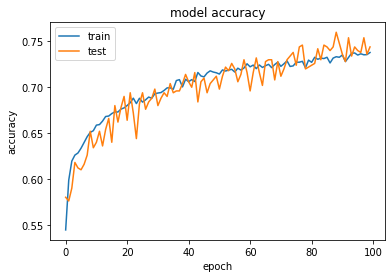

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


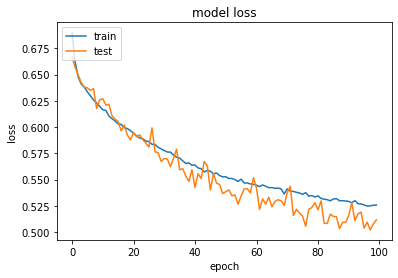

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [ ]:
confusion_matrix(y_test, y_pred.round())

array([[154,  69],
       [ 45, 207]])

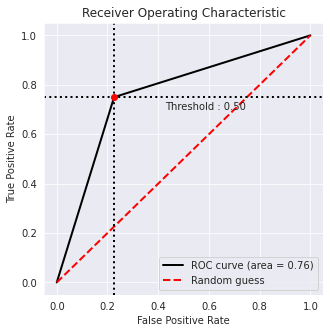

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_pred.round(), y_test, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

# Machine Learning Classifiers

In [ ]:
print("Random Forest Classifier")
model_1 = RandomForestClassifier(n_estimators=2000)
model_1.fit(X_train,y_train)
m1_prediction = model_1.predict(X_test)
print(classification_report(y_test,m1_prediction))
print(confusion_matrix(y_test,m1_prediction))
print(accuracy_score(y_test,m1_prediction)*100)

Random Forest Classifier
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       223
         1.0       0.74      0.71      0.73       252

    accuracy                           0.71       475
   macro avg       0.71      0.71      0.71       475
weighted avg       0.71      0.71      0.71       475

[[159  64]
 [ 72 180]]
71.36842105263158


In [ ]:
print("Linear kernel Support Vector Classifier")
model_2 = svm.SVC(kernel='linear')
model_2.fit(X_train,y_train)
m2_prediction = model_2.predict(X_test)

# performance
print(classification_report(y_test,m2_prediction))
print(confusion_matrix(y_test,m2_prediction))
print(accuracy_score(y_test,m2_prediction)*100)

Linear kernel Support Vector Classifier
              precision    recall  f1-score   support

         0.0       0.71      0.53      0.61       223
         1.0       0.66      0.81      0.73       252

    accuracy                           0.68       475
   macro avg       0.68      0.67      0.67       475
weighted avg       0.68      0.68      0.67       475

[[119 104]
 [ 49 203]]
67.78947368421052


In [ ]:
print("Poly kernel Support Vector Classifier")
model_3 = svm.SVC(kernel='poly',degree=4)
model_3.fit(X_train,y_train)
m3_prediction = model_3.predict(X_test)

# performance
print(classification_report(y_test,m3_prediction))
print(confusion_matrix(y_test,m3_prediction))
print(accuracy_score(y_test,m3_prediction)*100)

Poly kernel Support Vector Classifier
              precision    recall  f1-score   support

         0.0       0.64      0.54      0.59       223
         1.0       0.64      0.73      0.68       252

    accuracy                           0.64       475
   macro avg       0.64      0.63      0.63       475
weighted avg       0.64      0.64      0.64       475

[[121 102]
 [ 69 183]]
64.0


In [ ]:
print("Sigmoid kernel Support Vector Classifier")
model_4 = svm.SVC(kernel='sigmoid')
model_4.fit(X_train,y_train)
m4_prediction = model_4.predict(X_test)

# performance
print(classification_report(y_test,m4_prediction))
print(confusion_matrix(y_test,m4_prediction))
print(accuracy_score(y_test,m4_prediction)*100)

Sigmoid kernel Support Vector Classifier
              precision    recall  f1-score   support

         0.0       0.46      0.48      0.47       223
         1.0       0.52      0.51      0.52       252

    accuracy                           0.49       475
   macro avg       0.49      0.49      0.49       475
weighted avg       0.49      0.49      0.49       475

[[106 117]
 [124 128]]
49.26315789473684


In [ ]:
print("Naive Bayes Classifier")

model_5 = GaussianNB()
model_5.fit(X_train,y_train)
m5_prediction = model_5.predict(X_test)


print(classification_report(y_test,m5_prediction))
print(confusion_matrix(y_test,m5_prediction))
print(accuracy_score(y_test,m5_prediction)*100)

Naive Bayes Classifier
              precision    recall  f1-score   support

         0.0       0.58      0.32      0.41       223
         1.0       0.57      0.79      0.66       252

    accuracy                           0.57       475
   macro avg       0.57      0.56      0.54       475
weighted avg       0.57      0.57      0.55       475

[[ 72 151]
 [ 53 199]]
57.05263157894736


In [ ]:
print("Logistic Regression Classifier")
model_6 = LogisticRegression(random_state=0).fit(X_train,y_train)
m6_prediction = model_6.predict(X_test)

print(classification_report(y_test,m6_prediction))
print(confusion_matrix(y_test,m6_prediction))
print(accuracy_score(y_test,m6_prediction)*100)

Logistic Regression Classifier
              precision    recall  f1-score   support

         0.0       0.67      0.60      0.63       223
         1.0       0.67      0.74      0.70       252

    accuracy                           0.67       475
   macro avg       0.67      0.67      0.67       475
weighted avg       0.67      0.67      0.67       475

[[133  90]
 [ 66 186]]
67.15789473684211


In [ ]:
print("Stochastic Gradient Descent Classifier")
model_7 = SGDClassifier(loss='perceptron',shuffle=True,penalty='l1').fit(X_train,y_train)
m7_prediction = model_7.predict(X_test)

print(classification_report(y_test,m7_prediction))
print(confusion_matrix(y_test,m7_prediction))
print(accuracy_score(y_test,m7_prediction)*100)

Stochastic Gradient Descent Classifier
              precision    recall  f1-score   support

         0.0       0.53      0.86      0.66       223
         1.0       0.73      0.33      0.45       252

    accuracy                           0.58       475
   macro avg       0.63      0.59      0.55       475
weighted avg       0.63      0.58      0.55       475

[[192  31]
 [170  82]]
57.684210526315795


In [ ]:
for i in range(2,10):
  print(f"{i}-NN Classifier")
  model_8 = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
  m8_prediction = model_8.predict(X_test)

  print(classification_report(y_test,m8_prediction))
  print(confusion_matrix(y_test,m8_prediction))
  print(accuracy_score(y_test,m8_prediction)*100)

2-NN Classifier
              precision    recall  f1-score   support

         0.0       0.51      0.75      0.61       223
         1.0       0.63      0.37      0.46       252

    accuracy                           0.55       475
   macro avg       0.57      0.56      0.54       475
weighted avg       0.57      0.55      0.53       475

[[168  55]
 [160  92]]
54.736842105263165
3-NN Classifier
              precision    recall  f1-score   support

         0.0       0.54      0.50      0.52       223
         1.0       0.59      0.63      0.61       252

    accuracy                           0.57       475
   macro avg       0.57      0.56      0.56       475
weighted avg       0.57      0.57      0.57       475

[[111 112]
 [ 93 159]]
56.84210526315789
4-NN Classifier
              precision    recall  f1-score   support

         0.0       0.54      0.70      0.61       223
         1.0       0.64      0.48      0.55       252

    accuracy                           0.58       4

# My own NN architecture

Epoch 1/200
1000/1000 [==============================] - 4s 3ms/step - loss: 0.6935 - accuracy: 0.5270 - val_loss: 0.6865 - val_accuracy: 0.5480
Epoch 2/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6891 - accuracy: 0.5294 - val_loss: 0.6835 - val_accuracy: 0.5480
Epoch 3/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6783 - accuracy: 0.5547 - val_loss: 0.6738 - val_accuracy: 0.5520
Epoch 4/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6610 - accuracy: 0.5974 - val_loss: 0.6567 - val_accuracy: 0.6120
Epoch 5/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6500 - accuracy: 0.6142 - val_loss: 0.6563 - val_accuracy: 0.5940
Epoch 6/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6450 - accuracy: 0.6153 - val_loss: 0.6629 - val_accuracy: 0.5840
Epoch 7/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6408 - accuracy: 0.6210 - val_loss: 0.6445 - val_ac

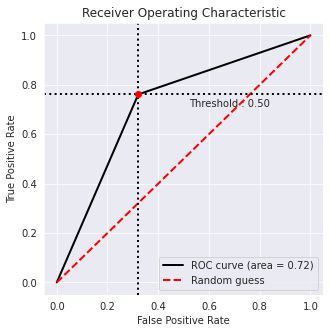

In [ ]:
model_nn = Sequential()
model_nn.add(Dense(28, input_dim=28, activation='relu'))
model_nn.add(Dense(64, activation='tanh'))
model_nn.add(Dropout(0.4))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(16, activation='tanh'))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(4, activation='tanh'))
model_nn.add(Dense(1, activation='sigmoid'))

model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)
# fit the keras model on the dataset
history=model_nn.fit(X, y,validation_data=(X_val,y_val),epochs=200,batch_size=10, callbacks=[es])
# evaluate the keras model
_, accuracy = model_nn.evaluate(X, y)
model_nn.save('my_model.h5') ##Saving model weights
print('Accuracy: %.2f' % (accuracy*100))

print(history.history.keys())

# confusion_matrix(y_test, y_pred.round())

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_pred.round(), y_test, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

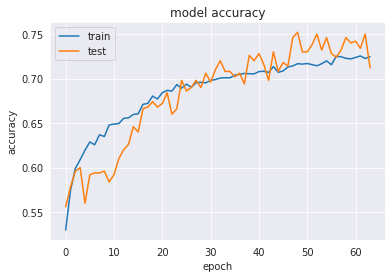

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


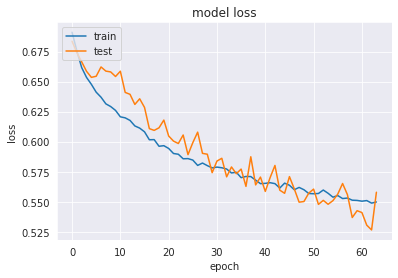

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred=model_nn.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred.round()).ravel()

In [ ]:
print(classification_report(y_test,y_pred.round()))
# print(confusion_matrix(y_test,y_pred.round()))
print(accuracy_score(y_test,y_pred.round())*100)

              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72       223
         1.0       0.76      0.68      0.72       252

    accuracy                           0.72       475
   macro avg       0.72      0.72      0.72       475
weighted avg       0.72      0.72      0.72       475

71.78947368421052


Text(91.68, 0.5, 'Actual label')

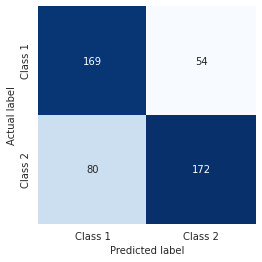

In [ ]:
labels=["Class 1", "Class 2"]
sns.heatmap(confusion_matrix(y_test, y_pred.round()), square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# Different approach

In [ ]:
initial_learning_rate = 0.1
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [ ]:
model_nn = Sequential()
model_nn.add(Dense(28, input_dim=28, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dense(64, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dense(32, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dense(16, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dense(8, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dropout(0.4))
model_nn.add(Dense(4, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dense(1, activation='sigmoid'))

# kernel_initializer='lecun_normal',activation='selu'))

model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)
# fit the keras model on the dataset
history=model_nn.fit(X, y,validation_data=(X_val,y_val),epochs=200,batch_size=10, callbacks=[es])
# evaluate the keras model
_, accuracy = model_nn.evaluate(X, y)
model_nn.save('my_model.h5') ##Saving model weights
print('Accuracy: %.2f' % (accuracy*100))

print(history.history.keys())


Epoch 1/200
1000/1000 [==============================] - 6s 3ms/step - loss: 0.7465 - accuracy: 0.5167 - val_loss: 0.6820 - val_accuracy: 0.5600
Epoch 2/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6913 - accuracy: 0.5374 - val_loss: 0.6766 - val_accuracy: 0.5860
Epoch 3/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6783 - accuracy: 0.5721 - val_loss: 0.6808 - val_accuracy: 0.5800
Epoch 4/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6679 - accuracy: 0.5956 - val_loss: 0.6626 - val_accuracy: 0.6060
Epoch 5/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6629 - accuracy: 0.6033 - val_loss: 0.6619 - val_accuracy: 0.5960
Epoch 6/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6560 - accuracy: 0.6090 - val_loss: 0.6537 - val_accuracy: 0.6100
Epoch 7/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6536 - accuracy: 0.6087 - val_loss: 0.6507 - val_ac

NameError: ignored

In [ ]:
bc = BinaryClassification(y_pred.round(), y_test, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

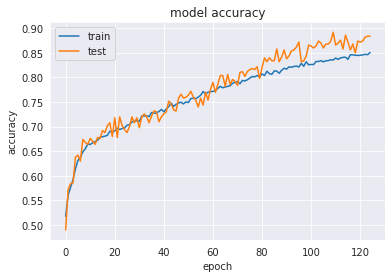

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


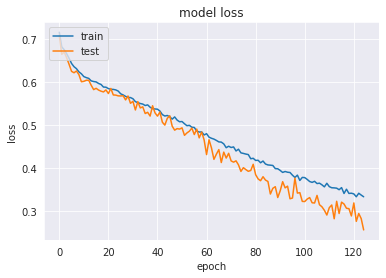

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred=model_nn.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test,y_pred.round()))
# print(confusion_matrix(y_test,y_pred.round()))
print(accuracy_score(y_test,y_pred.round())*100)

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       223
         1.0       0.91      0.85      0.88       252

    accuracy                           0.88       475
   macro avg       0.88      0.88      0.88       475
weighted avg       0.88      0.88      0.88       475

88.0


Text(91.68, 0.5, 'Actual label')

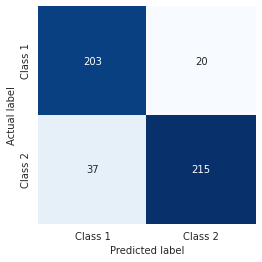

In [ ]:
labels=["Class 1", "Class 2"]
sns.heatmap(confusion_matrix(y_test, y_pred.round()), square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# Best model (0.9 accuracy) and saved weights

In [ ]:
# Definition of the model
model_nn = Sequential()
model_nn.add(Dense(28, input_dim=28, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dense(64, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dense(32, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dense(16, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dense(8, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dropout(0.4))
model_nn.add(Dense(4, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dense(1, activation='sigmoid'))

# kernel_initializer='lecun_normal',activation='selu'))

model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)

# fit the keras model on the dataset
history=model_nn.fit(X, y,validation_data=(X_val,y_val),epochs=200,batch_size=10, callbacks=[es])

# evaluate the keras model
_, accuracy = model_nn.evaluate(X, y)
model_nn.save('my_model.h5') ##Saving model weights

print('Accuracy: %.2f' % (accuracy*100))
print(history.history.keys())

Epoch 1/200
1000/1000 [==============================] - 6s 3ms/step - loss: 0.7051 - accuracy: 0.5286 - val_loss: 0.6848 - val_accuracy: 0.5560
Epoch 2/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6758 - accuracy: 0.5760 - val_loss: 0.6674 - val_accuracy: 0.5900
Epoch 3/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6650 - accuracy: 0.5926 - val_loss: 0.6665 - val_accuracy: 0.5900
Epoch 4/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6595 - accuracy: 0.6069 - val_loss: 0.6578 - val_accuracy: 0.6020
Epoch 5/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6513 - accuracy: 0.6155 - val_loss: 0.6572 - val_accuracy: 0.6100
Epoch 6/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6455 - accuracy: 0.6277 - val_loss: 0.6531 - val_accuracy: 0.6140
Epoch 7/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6372 - accuracy: 0.6429 - val_loss: 0.6548 - val_ac

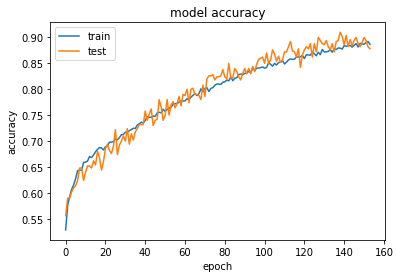

In [ ]:
# Plot tain/validation accuracy at each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

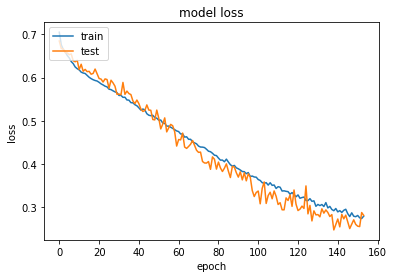

In [ ]:
# Plot tain/validation loss at each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred=model_nn.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [ ]:
# Visualisation with plot_metric
bc = BinaryClassification(y_pred.round(), y_test, labels=["Class 1", "Class 2"])

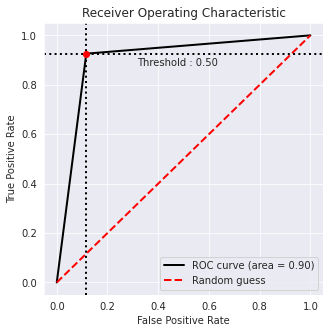

In [ ]:
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [ ]:
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test,y_pred.round())*100)

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       223
         1.0       0.93      0.89      0.91       252

    accuracy                           0.91       475
   macro avg       0.90      0.91      0.91       475
weighted avg       0.91      0.91      0.91       475

90.52631578947368


Text(91.68, 0.5, 'Actual label')

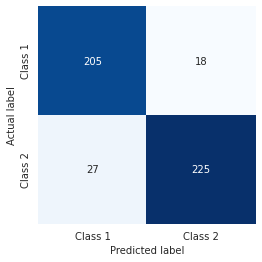

In [ ]:
labels=["Class 1", "Class 2"]
sns.heatmap(confusion_matrix(y_test, y_pred.round()), square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
print(model_nn.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 28)                812       
                                                                 
 dense_36 (Dense)            (None, 64)                1856      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 8)                 136       
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_40 (Dense)            (None, 4)                

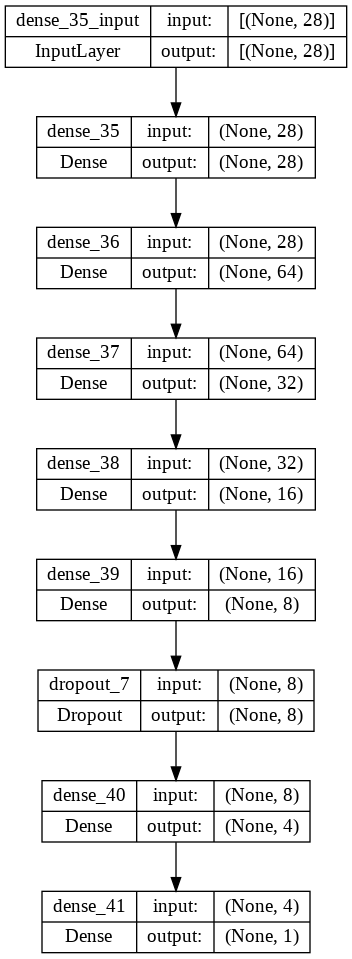

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_nn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Last approach

In [ ]:
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=28, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dense(32, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dense(16, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dense(8, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dropout(0.4))
model_nn.add(Dense(4, kernel_initializer='lecun_normal', activation='selu'))
model_nn.add(Dense(1, activation='sigmoid'))

# kernel_initializer='lecun_normal',activation='selu'))

model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)
# fit the keras model on the dataset
history=model_nn.fit(X, y,validation_data=(X_val,y_val),epochs=200,batch_size=10, callbacks=[es])
# evaluate the keras model
_, accuracy = model_nn.evaluate(X, y)
model_nn.save('my_model.h5') ##Saving model weights
print('Accuracy: %.2f' % (accuracy*100))
print(history.history.keys())

Epoch 1/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.7032 - accuracy: 0.5238 - val_loss: 0.6802 - val_accuracy: 0.5540
Epoch 2/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6823 - accuracy: 0.5509 - val_loss: 0.6679 - val_accuracy: 0.5580
Epoch 3/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6729 - accuracy: 0.5783 - val_loss: 0.6698 - val_accuracy: 0.5720
Epoch 4/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6603 - accuracy: 0.5997 - val_loss: 0.6556 - val_accuracy: 0.6060
Epoch 5/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6520 - accuracy: 0.6037 - val_loss: 0.6515 - val_accuracy: 0.5940
Epoch 6/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6462 - accuracy: 0.6117 - val_loss: 0.6456 - val_accuracy: 0.6200
Epoch 7/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6410 - accuracy: 0.6257 - val_loss: 0.6458 - val_ac

In [ ]:
y_pred=model_nn.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test,y_pred.round())*100)

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       223
         1.0       0.88      0.78      0.83       252

    accuracy                           0.83       475
   macro avg       0.83      0.83      0.83       475
weighted avg       0.83      0.83      0.83       475

82.73684210526315


Text(91.68, 0.5, 'Actual label')

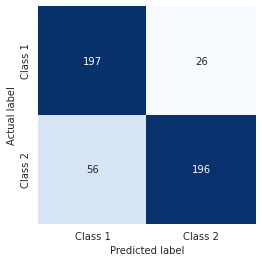

In [ ]:
labels=["Class 1", "Class 2"]
sns.heatmap(confusion_matrix(y_test, y_pred.round()), square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
!cp my_model.h5 gdrive/MyDrive/

# Neural Search Approach